<a href="https://colab.research.google.com/github/ipeirotis/sql_autograding/blob/main/Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth

# Login using the account that has access to the Google project
# in order to access the resources for the project
auth.authenticate_user()

In [2]:
from google.colab import files
import io
import pandas as pd

In [3]:
import gcsfs

fs = gcsfs.GCSFileSystem(project="sql_autograding")
with fs.open("gs://sql_autograding/completion.csv") as f:
    data = pd.read_csv(f)

In [4]:
data = data.drop(columns='Unnamed: 0')
data.head()

,BSpace Course Name,BSpace Course Id,QuizName,﻿QuizId,QuizAttemptNumber,QuestionId,Question,QuestionType,InputUserAnswer,Score,...,full_score,feedback,schema,0_mp,4_answer,4_grade,4_feedback,3_answer,3_grade,3_feedback
0,"Databases for Business Analytics, Winter 2023","251,683",Final Exam,"283,453",1,"4,969,729",Hard question. Requires use of subqueries and ...,Long Answer Question,"SELECT \n A.CustomerID,\n A.CompanyName,...",10.0,...,10.0,The feedback from the TA was Results for ident...,"([{'Categories': ['CategoryID', 'CategoryName'...",\n a. We are working with the ['northwi...,Grade: 9/10\n\nFeedback: Your answer is almost...,9,Your answer is almost perfect. You have correc...,Grade: 7/10\n\nFeedback: \n- The student's que...,7,\n- The student's query is mostly correct and ...
1,"Databases for Business Analytics, Winter 2023","251,683",Final Exam,"283,453",1,"4,969,713","For each order, show the customerID who placed...",Long Answer Question,"Select O.OrderID, O.CustomerID, Count(D.Produ...",5.5,...,10.0,The feedback from the TA was -3 pts for lack f...,"([{'Categories': ['CategoryID', 'CategoryName'...",\n a. We are working with the ['northwi...,Grade: 8/10\n\nFeedback: Your SQL query is mos...,8,Your SQL query is mostly correct and it shows ...,Grade: 8/10\n\nFeedback: \n- The student corre...,8,\n- The student correctly joins the Orders and...
2,"Databases for Business Analytics, Winter 2023","251,683",Final Exam,"283,453",1,"4,969,711",We want to identify the ship countries with th...,Long Answer Question,"use northwind;\nSELECT \n ShipCountry, AVG(...",7.0,...,7.5,"The feedback from the TA was It is ""LIMIT 3"" n...","([{'Categories': ['CategoryID', 'CategoryName'...",\n a. We are working with the ['northwi...,Grade: 9/10\n\nFeedback: Your SQL query is alm...,9,Your SQL query is almost perfect. You have cor...,Grade: 7/10\n\nFeedback: \n- The query provide...,7,\n- The query provided by the student is almos...
3,"Databases for Business Analytics, Winter 2023","251,683",Final Exam,"283,453",1,"4,969,710",For every customer in the database list the nu...,Long Answer Question,"Select C.CompanyName, C.CustomerID, sum(case w...",10.0,...,10.0,NaN,"([{'Categories': ['CategoryID', 'CategoryName'...",\n a. We are working with the ['northwi...,Grade: 10/10\n\nFeedback: Excellent job! Your ...,10,Excellent job! Your query correctly retrieves ...,Grade: 8/10\n\nFeedback: \n- The query provide...,8,\n- The query provided by the student is corre...
4,"Databases for Business Analytics, Winter 2023","251,683",Final Exam,"283,453",1,"4,969,709",Show the date/time of the first order ever dat...,Long Answer Question,use northwind;\nSELECT \n min(OrderDate) as...,7.5,...,7.5,NaN,"([{'Categories': ['CategoryID', 'CategoryName'...",\n a. We are working with the ['northwi...,Grade: 10/10\n\nFeedback: Great job! Your SQL ...,10,Great job! Your SQL query correctly retrieves ...,Grade: 8/10\n\nFeedback: \n- The query provide...,8,\n- The query provided by the student is corre...


In [5]:
data.columns

Index(['BSpace Course Name', 'BSpace Course Id', 'QuizName', '﻿QuizId',
       'QuizAttemptNumber', 'QuestionId', 'Question', 'QuestionType',
       'InputUserAnswer', 'Score', 'NetId', 'Comment left on User Response',
       'AnswerKey', 'isQuery', 'Database', 'full_score', 'feedback', 'schema',
       '0_mp', '4_answer', '4_grade', '4_feedback', '3_answer', '3_grade',
       '3_feedback'],
      dtype='object')

In [6]:
def is_float(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

In [7]:
def parse4(text):
  grade = 0
  f = text.split('.')[0].split(' ')
  for i,w in enumerate(f):
    if w == "out" and i > 0:
      grade = f[i-1]
      break

  feedback = text.split('.')[1:]
  return grade, feedback

In [8]:
def parse3(text):
  grade_start = text.find("Grade: ") + len("Grade: ")
  grade_end = text.find("/", grade_start)
  grade = text[grade_start:grade_end]

  feedback_start = text.find("Feedback: ") + len("Feedback: ")
  feedback = text[feedback_start:]
  return grade, feedback


In [9]:
for i,r in data.iterrows():
  if is_float(r['4_grade'])==False:
    g,f = parse4(r['4_answer'])
    data.at[i,'4_grade'] = g
    data.at[i,'4_feedback'] = f
  elif is_float(r['3_grade'])==False:
    g,f = parse3(r['3_answer'])
    data.at[i,'3_grade'] = g
    data.at[i,'3_feedback'] = f

In [10]:
data['3_grade'].value_counts()

8     2010
9      820
7      642
6      119
5       22
10      19
4       11
3        2
2        1
Name: 3_grade, dtype: int64

In [11]:
df = data[['QuestionId', 'Score', 'Database', 'full_score', '4_grade', '3_grade']]
df.head()

,QuestionId,Score,Database,full_score,4_grade,3_grade
0,"4,969,729",10.0,"['northwind', 'flights']",10.0,9,7
1,"4,969,713",5.5,"['northwind', 'flights']",10.0,8,8
2,"4,969,711",7.0,"['northwind', 'flights']",7.5,9,7
3,"4,969,710",10.0,"['northwind', 'flights']",10.0,10,8
4,"4,969,709",7.5,"['northwind', 'flights']",7.5,10,8


In [12]:
# scale gpt score
df['4_grade'] = (df['4_grade'].astype(float))*(df['full_score'].astype(float))/10
df['3_grade'] = (df['3_grade'].astype(float))*(df['full_score'].astype(float))/10
df.head()

<ipython-input-12-d307e72e2cc2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['4_grade'] = (df['4_grade'].astype(float))*(df['full_score'].astype(float))/10
<ipython-input-12-d307e72e2cc2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['3_grade'] = (df['3_grade'].astype(float))*(df['full_score'].astype(float))/10


,QuestionId,Score,Database,full_score,4_grade,3_grade
0,"4,969,729",10.0,"['northwind', 'flights']",10.0,9.00,7.00
1,"4,969,713",5.5,"['northwind', 'flights']",10.0,8.00,8.00
2,"4,969,711",7.0,"['northwind', 'flights']",7.5,6.75,5.25
3,"4,969,710",10.0,"['northwind', 'flights']",10.0,10.00,8.00
4,"4,969,709",7.5,"['northwind', 'flights']",7.5,7.50,6.00


In [21]:
# who is the exact grade? - autograde
df['4_error'] = ((df['Score'] - df['4_grade']).abs() / (df['Score']+df['4_grade'])/2)
df['3_error'] = ((df['Score'] - df['3_grade']).abs() / (df['Score']+df['3_grade'])/2)
# .map('{:.2%}'.format)
df.head()

<ipython-input-21-e3adaf211238>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['4_error'] = ((df['Score'] - df['4_grade']).abs() / (df['Score']+df['4_grade'])/2)
<ipython-input-21-e3adaf211238>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['3_error'] = ((df['Score'] - df['3_grade']).abs() / (df['Score']+df['3_grade'])/2)


,QuestionId,Score,Database,full_score,4_grade,3_grade,4_error,3_error
0,"4,969,729",10.0,"['northwind', 'flights']",10.0,9.00,7.00,0.026316,0.088235
1,"4,969,713",5.5,"['northwind', 'flights']",10.0,8.00,8.00,0.092593,0.092593
2,"4,969,711",7.0,"['northwind', 'flights']",7.5,6.75,5.25,0.009091,0.071429
3,"4,969,710",10.0,"['northwind', 'flights']",10.0,10.00,8.00,0.000000,0.055556
4,"4,969,709",7.5,"['northwind', 'flights']",7.5,7.50,6.00,0.000000,0.055556


In [22]:
df[['4_error', '3_error']].describe()

,4_error,3_error
count,3645.000000,3646.000000
mean,0.029580,0.053757
std,0.062593,0.028849
min,0.000000,0.000000
25%,0.000000,0.026316
50%,0.000000,0.055556
75%,0.026316,0.055556
max,0.500000,0.340000


In [23]:
dbs = df['Database'].unique()
error_lst_4 = []
error_lst_3 = []
for db in dbs:
  temp = df[df['Database']==db]
  error_lst_4.append(temp['4_error'].mean())
  error_lst_3.append(temp['3_error'].mean())
print(error_lst_4)

[0.026224655114074454, 0.024043097193701287, 0.029837453537246355, 0.08003734038312549]


In [24]:
print(error_lst_3)

[0.05194024078729233, 0.05089854423109014, 0.06423984063975988, 0.07394207143719624]


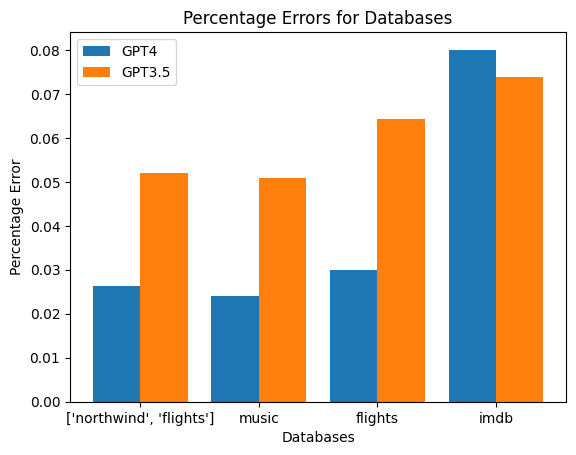

In [25]:
import matplotlib.pyplot as plt
import numpy as np

X_axis = np.arange(len(dbs))

plt.bar(X_axis - 0.2, error_lst_4, 0.4, label = 'GPT4')
plt.bar(X_axis + 0.2, error_lst_3, 0.4, label = 'GPT3.5')

plt.xticks(X_axis, dbs)
plt.xlabel("Databases")
plt.ylabel("Percentage Error")
plt.title("Percentage Errors for Databases")
plt.legend()
plt.show()